In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
df=pd.read_csv(r"E:\HackerEarth Contest\Train.csv") #loading Train Data 

In [76]:
test=pd.read_csv(r"E:\HackerEarth Contest\Test.csv") #Loading Test Data

In [77]:
df.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [78]:
test.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,IT_265079,2014-01-19,0,3,0,0,0.1,5303
1,IT_265087,2014-01-19,0,268,0,2,1.4,10492
2,IT_265107,2014-01-19,0,320,0,0,13.4,24706
3,IT_265139,2014-01-19,17,358,0,3,5.5,23464
4,IT_265142,2014-01-19,18,23,5,2,0.0,6222


In [79]:
X=df.drop(['Date','Item_Id','Low_Cap_Price'],axis=1)   #Removing Unnecessary Features from Train data as well as test data
y=df['Low_Cap_Price']

In [80]:
X1=test.drop(['Date','Item_Id'],axis=1) 
X2=X1

In [81]:
from sklearn.preprocessing import RobustScaler  #Scaling the data values in order to remove outliers as Demand Feature as many outliers
scaler=RobustScaler()
X=scaler.fit_transform(X)
X1=scaler.transform(X1)

In [82]:
df1=df.drop(['Date','Item_Id','Low_Cap_Price'],axis=1) #Creating dummy

In [83]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=9)

In [84]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=9,random_state=9) #Using Random Forest for predicting and analysing Train Dataset 
reg.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=9, verbose=0, warm_start=False)

In [85]:
ypred=reg.predict(xtest)

In [86]:
from sklearn.metrics import r2_score,mean_squared_log_error
print(r2_score(ytest,ypred))

0.8252031656000537


In [87]:
print(max(0,(100-mean_squared_log_error(ytest,ypred))))

99.91216450845083


In [88]:
#Now using Test Data for predicting Low_Cap_Price
pred1=reg.predict(X1)

In [89]:
pred1

array([3352.91088742, 2654.54015523, 6406.10844694, ..., 6509.11086196,
       5751.13452273, 7728.26719614])

In [90]:
df2=pd.DataFrame({'Low_Cap_Price':pred1})

In [91]:
df2=df2.astype('int')

In [92]:
df2

,Low_Cap_Price
0,3352
1,2654
2,6406
3,6761
4,1922
...,...
5758,7487
5759,6149
5760,6509
5761,5751


In [93]:
A=test['Item_Id']

In [94]:
A

0       IT_265079
1       IT_265087
2       IT_265107
3       IT_265139
4       IT_265142
          ...    
5758    IT_361691
5759    IT_361694
5760    IT_361699
5761    IT_361719
5762    IT_361723
Name: Item_Id, Length: 5763, dtype: object

In [95]:
Submission=pd.concat([A,df2],axis=1)

In [96]:
Submission.to_csv(r"E:\HackerEarth Contest\Predicted Values.csv",index=False)

In [97]:
from sklearn.feature_selection import SelectFromModel

In [98]:
feat=pd.Series(reg.feature_importances_,index=df1.columns).sort_values(ascending=False)

In [99]:
feat

High_Cap_Price      0.718018
State_of_Country    0.147350
Demand              0.066774
Market_Category     0.038370
Product_Category    0.018590
Grade               0.010898
dtype: float64

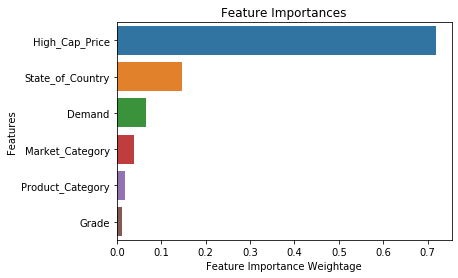

In [100]:
sns.barplot(x=feat,y=feat.index)
plt.title('Feature Importances')
plt.xlabel('Feature Importance Weightage')
plt.ylabel('Features')
plt.show()

In [140]:
from sklearn.feature_selection import SelectFromModel
feat_sel=SelectFromModel(reg,threshold=0.03)
feat_sel.fit(xtrain,ytrain)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=9,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False, random_state=9,
                                                verbose=0, warm_start=False),
                max_features=None, nor

In [141]:
x_train=feat_sel.transform(xtrain)
x_test=feat_sel.transform(xtest)
X1_test=feat_sel.transform(X1)

In [142]:
clf=RandomForestRegressor(n_estimators=100,criterion='mse',max_depth=9,random_state=32)
clf.fit(x_train,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=32, verbose=0, warm_start=False)

In [143]:
ypred1=clf.predict(x_test)

In [144]:
print(r2_score(ytest,ypred1))

0.8232365606226529


In [145]:
from sklearn.metrics import mean_squared_log_error
print(max(0,(100-mean_squared_log_error(ytest,ypred1))))

99.90867426044387


In [146]:
ypred2=clf.predict(X1_test)

In [147]:
df3=pd.DataFrame({'Low_Cap_Price':ypred2})

In [148]:
df3=df3.astype('int')

In [149]:
Submission1=pd.concat([A,df3],axis=1)

In [150]:
Submission1.to_csv(r"E:\HackerEarth Contest\Predicted Values1.csv",index=False)